This notebook performs a few analytical integrations in order to have functions to compare against for testing purposes with the numerical integration.

In [1]:
from sage.all import *
import pickle

sx, sy = var('sx, sy')

ox, oy = var('ox, oy')

dx = ox - sx
dy = oy - sy
r2 = (dx ** 2) + (dy ** 2)

r = sqrt(r2)
G = (1 / (2 * pi)) * log(r)

Because we're integrating over a 2D domain, we need to integrate first over `sx`, then over `sy`. The first integral over `sx` can be done without many assumptions. 

In [2]:
forget()
# assume that the solution is not singular. this assumption isn't strictly
# correct, but it convinces sage to do the integration.
assume(sy-oy>0)

# these two assumptions are also not correct in light of the later integration
# of sy from -1 to 1. however, the integral will be the same regardless of which
# subdomain we specify. so, this is essentially a hack to convince sage to
# compute the integral for us.
assume(sy > 0)
assume(sy < 1)
Ia = integral(G, sx, -1, 1)

The second integral requires assuming a location for the observation point. First, we assume a point inside the domain of integration.

In [3]:
assume(ox > -1)
assume(ox < 1)
assume(oy > -1)
coincident = integral(Ia, sy, -1, 1)

Below, we assume `ox > 1` and `oy > 1`. This would imply that the observation point is outside the domain of integration to the upper right.

In [4]:
forget()
assume(ox > 1)
assume(oy > 1)
nearfield = integral(Ia, sy, -1, 1)

In [5]:
import sympy
sympy.__version__

'1.9'

In [6]:
import pickle
with open('data/constant_test_integral.pkl', 'wb') as f:
    pickle.dump([coincident._sympy_(), nearfield._sympy_()], f)

In [7]:
forget()
assume(sy-oy>0)
assume(sy > 0)
assume(sy < 1)
Ia = integral(G * (1 - (1 - sx) ** 3) * (1 - (sy + 1) ** 2), sx, -1, 1)

In [8]:
assume(ox > -1)
assume(ox < 1)
assume(oy > -1)
coincident = integral(Ia, sy, -1, 1)

In [9]:
forget()
assume(ox > 1)
assume(oy > 1)
nearfield = integral(Ia, sy, -1, 1)

In [10]:
import pickle
with open('data/xy_test_integral.pkl', 'wb') as f:
    pickle.dump([coincident._sympy_(), nearfield._sympy_()], f)

In [11]:
for integrand, name in [(G, 'constant'), (G * (1 - sx) * (1 - sy ** 2), 'xy')]:
    
    transformed_nearfield = []
    for mult in [1, 2, 4, 8, 16]:
        forget()
        src_c = [0, 0]
        src_half_size = mult / 8
        assume(sy-oy > 0)
        Ia = integral(integrand, sx, src_c[0] - src_half_size, src_c[0] + src_half_size)
        assume(ox - (src_c[0] + src_half_size) > 0)
        assume(oy - (src_c[1] + src_half_size) > 0)

        transformed_nearfield.append(integral(Ia, sy, src_c[1] - src_half_size, src_c[1] + src_half_size))

    import pickle
    with open(f'data/{name}_transformed_test_integral.pkl', 'wb') as f:
        pickle.dump([I._sympy_() for I in transformed_nearfield], f)

In [12]:
N = 7
chebyshev_pts = [cos(pi * i / (N - 1)) for i in range(N)][::-1]
x = var("x")

In [13]:
basis_functions = []
for i in range(N):
    xi = chebyshev_pts[i]
    prod = 1
    # The definition of the Lagrange interpolating polynomial.
    # In a numerical context, this definition is troublesome
    # and it's better to use the barycentric Lagrange formulas.
    # But this simple definition works fantastically well in
    # a symbolic setting.
    for j in range(N):
        if j == i:
            continue
        xj = chebyshev_pts[j]
        prod *= (x - xj) / (xi - xj)
    basis_functions.append(prod.simplify().expand())

In [14]:
basis_functions

[-8/3*x^6/((sqrt(3) + 2)*(sqrt(3) - 2)) + 8/3*x^5/((sqrt(3) + 2)*(sqrt(3) - 2)) + 8/3*x^4/((sqrt(3) + 2)*(sqrt(3) - 2)) - 8/3*x^3/((sqrt(3) + 2)*(sqrt(3) - 2)) - 1/2*x^2/((sqrt(3) + 2)*(sqrt(3) - 2)) + 1/2*x/((sqrt(3) + 2)*(sqrt(3) - 2)),
 32/3*x^6/((sqrt(3) + 2)*(sqrt(3) + 1)*(sqrt(3) - 1)*(sqrt(3) - 2)) - 16/3*sqrt(3)*x^5/((sqrt(3) + 2)*(sqrt(3) + 1)*(sqrt(3) - 1)*(sqrt(3) - 2)) - 40/3*x^4/((sqrt(3) + 2)*(sqrt(3) + 1)*(sqrt(3) - 1)*(sqrt(3) - 2)) + 20/3*sqrt(3)*x^3/((sqrt(3) + 2)*(sqrt(3) + 1)*(sqrt(3) - 1)*(sqrt(3) - 2)) + 8/3*x^2/((sqrt(3) + 2)*(sqrt(3) + 1)*(sqrt(3) - 1)*(sqrt(3) - 2)) - 4/3*sqrt(3)*x/((sqrt(3) + 2)*(sqrt(3) + 1)*(sqrt(3) - 1)*(sqrt(3) - 2)),
 32/3*x^6/((sqrt(3) + 1)*(sqrt(3) - 1)) - 16/3*x^5/((sqrt(3) + 1)*(sqrt(3) - 1)) - 56/3*x^4/((sqrt(3) + 1)*(sqrt(3) - 1)) + 28/3*x^3/((sqrt(3) + 1)*(sqrt(3) - 1)) + 8*x^2/((sqrt(3) + 1)*(sqrt(3) - 1)) - 4*x/((sqrt(3) + 1)*(sqrt(3) - 1)),
 -16/3*x^6 + 32/3*x^4 - 19/3*x^2 + 1,
 32/3*x^6/((sqrt(3) + 1)*(sqrt(3) - 1)) + 16/3*x^5/

In [22]:
Kb = (basis_functions[0].subs(x==sx) * basis_functions[1].subs(x == sy)).full_simplify() * G

In [24]:
Isx = integral(Kb, sx, -1, 1)

In [26]:
Isx_simp = Isx.full_simplify()

1/793800*(806400*(12*oy + sqrt(3))*sy^11 - 1612800*sy^12 + 26880*(900*ox^2 - 900*oy^2 - 180*sqrt(3)*oy - 350*ox + 11)*sy^10 + 13440*(2400*oy^3 - 900*sqrt(3)*ox^2 + 900*sqrt(3)*oy^2 - 4*(1800*ox^2 - 700*ox + 97)*oy + 350*sqrt(3)*ox - 11*sqrt(3))*sy^9 - 6720*(3600*ox^4 + 3600*oy^4 + 2400*sqrt(3)*oy^3 - 2800*ox^3 - 12*(1800*ox^2 - 700*ox + 247)*oy^2 + 2964*ox^2 - 4*(1800*sqrt(3)*ox^2 - 700*sqrt(3)*ox + 97*sqrt(3))*oy - 770*ox - 219)*sy^8 + 3360*(2880*oy^5 + 3600*sqrt(3)*ox^4 + 3600*sqrt(3)*oy^4 - 32*(900*ox^2 - 350*ox + 311)*oy^3 - 2800*sqrt(3)*ox^3 - 12*(1800*sqrt(3)*ox^2 - 700*sqrt(3)*ox + 247*sqrt(3))*oy^2 + 2964*sqrt(3)*ox^2 + 4*(3600*ox^4 - 2800*ox^3 + 7464*ox^2 - 2520*ox - 419)*oy - 770*sqrt(3)*ox - 219*sqrt(3))*sy^7 + 16*(100800*ox^6 - 100800*oy^6 - 302400*sqrt(3)*oy^5 - 117600*ox^5 + 1680*(900*ox^2 - 350*ox + 1061)*oy^4 + 1782480*ox^4 + 3360*(900*sqrt(3)*ox^2 - 350*sqrt(3)*ox + 311*sqrt(3))*oy^3 - 1332800*ox^3 - 420*(3600*ox^4 - 2800*ox^3 + 25464*ox^2 - 9520*ox - 979)*oy^2 - 41118

In [28]:
If = integral(Isx_simp, sy, -1, 1)

In [44]:
If

1/85816130400*sqrt(3)*(1209600*(sqrt(3)*arctan((oy - 1)/(ox + 1)) - sqrt(3)*arctan((oy - 1)/(ox - 1)))*oy^14 - 4233600*oy^13*(arctan((oy - 1)/(ox + 1)) - arctan((oy - 1)/(ox - 1))) - 20160*(91*(60*sqrt(3)*ox^2 - 20*sqrt(3)*ox + sqrt(3))*arctan((oy - 1)/(ox + 1)) - 91*(60*sqrt(3)*ox^2 - 20*sqrt(3)*ox + sqrt(3))*arctan((oy - 1)/(ox - 1)) - 240*sqrt(3))*oy^12 + 4838400*sqrt(3)*ox^12 + 211680*(13*(120*ox^2 - 40*ox + 7)*arctan((oy - 1)/(ox + 1)) - 13*(120*ox^2 - 40*ox + 7)*arctan((oy - 1)/(ox - 1)) - 80)*oy^11 - 11289600*sqrt(3)*ox^11 - 5040*(63360*sqrt(3)*ox^2 - 1001*(240*sqrt(3)*ox^4 - 160*sqrt(3)*ox^3 + 24*sqrt(3)*ox^2 + 8*sqrt(3)*ox - sqrt(3))*arctan((oy - 1)/(ox + 1)) + 1001*(240*sqrt(3)*ox^4 - 160*sqrt(3)*ox^3 + 24*sqrt(3)*ox^2 + 8*sqrt(3)*ox - sqrt(3))*arctan((oy - 1)/(ox - 1)) - 24640*sqrt(3)*ox + 1456*sqrt(3))*oy^10 + 7338240*sqrt(3)*ox^10 + 17640*(52800*ox^2 - 715*(240*ox^4 - 160*ox^3 + 84*ox^2 - 12*ox + 3)*arctan((oy - 1)/(ox + 1)) + 715*(240*ox^4 - 160*ox^3 + 84*ox^2 - 12*ox + 3

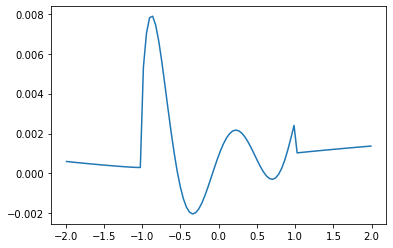

In [46]:
import numpy as np
xs = np.linspace(-1.99, 1.99, 100)
ys = [float(If.subs(ox==xv, oy==0.5)) for xv in xs]
import matplotlib.pyplot as plt
plt.plot(xs, ys)
plt.show()

In [67]:
r, theta = var('r, theta')
ox, oy = chebyshev_pts[0], chebyshev_pts[1]
T1 = atan2(-1-oy, 1-ox)
T2 = atan2(1-oy, 1-ox)
T1.subs(ox==0, oy==0), T2.subs(ox==0, oy==0)

(arctan(1/4*sqrt(3) - 1/2), arctan(1/4*sqrt(3) + 1/2))

In [68]:

assume(T1 < theta < T2)
assume(cos(theta) > 0)
Kbr = (basis_functions[0].subs(x==sx) * basis_functions[1].subs(x == sy)).full_simplify() * log(r)
Kbrt = Kbr.subs(sx==ox+r*cos(theta), sy==oy+r*sin(theta))
It = integrate(Kbrt * r, r, 0, (1-ox) / cos(theta))

In [69]:
It

2/945*sqrt(3)*log(2/cos(theta))*sin(theta)/cos(theta)^3 + 416/891*sqrt(3)*log(2/cos(theta))*sin(theta)^3/cos(theta)^5 + 12160/11583*sqrt(3)*log(2/cos(theta))*sin(theta)^5/cos(theta)^7 - 376/2835*log(2/cos(theta))*sin(theta)^2/cos(theta)^4 - 1088/567*log(2/cos(theta))*sin(theta)^4/cos(theta)^6 - 237056/405405*log(2/cos(theta))*sin(theta)^6/cos(theta)^8 - 47/595350*sqrt(3)*sin(theta)/cos(theta)^3 + 72176/617463*sqrt(3)*sin(theta)^3/cos(theta)^5 + 1984144/104351247*sqrt(3)*sin(theta)^5/cos(theta)^7 + 1/378/cos(theta)^2 - 3854/178605*sin(theta)^2/cos(theta)^4 - 494248/1964655*sin(theta)^4/cos(theta)^6 + 693363392/18261468225*sin(theta)^6/cos(theta)^8

In [66]:

integrate(It, theta, T1, T2)

ValueError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume(2*atan((oy+1)/(ox-1))-3*%pi>0)', see `assume?` for more details)
Is 2*atan((oy+1)/(ox-1))-3*%pi positive, negative or zero?

In [ ]:

integrate(Kb.subs(sx==ox+r*cos(theta), sy==oy+r*sin(theta)), theta, 0, 2*pi)

In [53]:
Ir = _

In [54]:
integrate(Ir, r, 0, 1)

1/876550474800*sqrt(3)*(11778624*(352800*sqrt(3)*ox^6 - 352800*sqrt(3)*ox^5 - 58800*sqrt(3)*ox^4 + 156800*sqrt(3)*ox^3 + 27930*sqrt(3)*ox^2 - 33810*sqrt(3)*ox + 633*sqrt(3))*oy^6 + 6301563840*sqrt(3)*ox^6 - 17667936*(352800*ox^6 - 352800*ox^5 - 58800*ox^4 + 156800*ox^3 + 27930*ox^2 - 33810*ox + 633)*oy^5 - 6301563840*sqrt(3)*ox^5 - 4907760*(352800*sqrt(3)*ox^6 - 352800*sqrt(3)*ox^5 - 423360*sqrt(3)*ox^4 + 399840*sqrt(3)*ox^3 + 89514*sqrt(3)*ox^2 - 78642*sqrt(3)*ox + 67*sqrt(3))*oy^4 + 2291923920*sqrt(3)*ox^4 + 2453880*(1764000*ox^6 - 1764000*ox^5 - 1023120*ox^4 + 1270080*ox^3 + 262818*ox^2 - 258714*ox + 2033)*oy^3 + 572572000*sqrt(3)*ox^3 + 8112*(29882160*sqrt(3)*ox^6 - 29882160*sqrt(3)*ox^5 - 64294560*sqrt(3)*ox^4 + 52823760*sqrt(3)*ox^3 + 8025930*sqrt(3)*ox^2 - 8704740*sqrt(3)*ox + 34099*sqrt(3))*oy^2 + 1112402616*sqrt(3)*ox^2 - 12168*(59764320*ox^6 - 59764320*ox^5 - 48112020*ox^4 + 51996120*ox^3 + 9722955*ox^2 - 9934705*ox + 72189)*oy - 585597168*sqrt(3)*ox + 860297*sqrt(3))